In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve,r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
import shutil
import graphviz
import dtreeviz


In [6]:
# 读取数据
data = pd.read_csv(r'D:\ArcGISProjects\workspace\duyun\result_table\feature_dy_havesom.csv')
print(len(data))
# 删除有缺失值的行
# data.dropna(inplace=True)
# len(data),data.columns

# 填补缺失值为列均值
data.fillna(data.mean(),inplace=True)

6498


In [9]:
data.rename(columns={'有机质含量':'SOM'},inplace=True)

In [10]:
duplicates = data.duplicated(subset=list(data.columns)[1:], keep='first')
df_duplicates = data[duplicates]
df_duplicates


,SOM,BIO,PRE,SRA,TMP,VAP,WIN,NDVI,TDQS,LIGHT,...,ProfileCurvature,RelativeSlopePosition,Slope,TopographicWetnessIndex,TotalCatchmentArea,ValleyDepth,DEM,LON,LAT,prediction_ph
105,30.8596,191.93000,100.250000,12975.583,15.575000,1.515000,1.650000,5937.2500,11,0.32,...,-0.013211,0.396114,0.543473,4.901549,551.45074,45.462402,950.89996,476870.0,2907905.0,6.078567
128,23.3000,188.68135,97.750000,12900.750,15.458333,1.515833,1.666667,5968.6665,12,0.39,...,-0.015172,0.211474,0.160172,7.596475,2090.75880,31.798462,889.70000,454680.0,2922765.0,5.831233
183,117.1000,190.44110,99.333336,12856.833,15.066667,1.475000,1.725000,5483.6665,12,0.48,...,-0.001800,0.005022,0.044689,6.488055,197.16510,40.329346,979.40000,457915.0,2920865.0,6.174400
323,39.1000,190.74652,99.000000,12926.583,15.666667,1.525833,1.666667,6123.4165,12,0.39,...,-0.003521,0.410191,0.099669,5.831614,170.45428,27.460205,858.30000,464675.0,2916150.0,5.847800
346,42.4000,190.64485,98.750000,12976.583,16.183334,1.568333,1.600000,4792.5835,11,1.31,...,-0.001239,0.084850,0.119835,7.140315,1072.52090,50.079956,732.50000,473200.0,2917010.0,6.334533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,21.8000,187.76186,97.333336,12947.417,15.350000,1.514167,1.741667,6855.8335,11,0.34,...,-0.013658,0.345897,0.601815,4.369909,383.32740,65.071045,995.90000,422460.0,2901145.0,5.419833
5444,53.1000,188.65889,98.416664,12825.833,14.650000,1.452500,1.791667,6554.4165,14,0.39,...,0.015443,0.735760,0.853928,3.622754,237.74886,16.855590,1220.50000,429215.0,2911980.0,5.326367
5492,60.1000,190.40323,100.000000,12813.500,14.125000,1.398333,1.858333,6345.7500,11,0.51,...,0.000826,0.102992,0.447609,5.632267,684.27527,90.968140,1217.50000,426920.0,2906950.0,7.020067
6355,39.0440,193.61485,100.166664,13168.500,17.083334,1.665833,1.550000,5654.9165,11,0.36,...,0.003686,0.157649,0.251648,5.986502,616.92570,50.888428,536.70000,475255.0,2879010.0,5.156833


In [11]:
# 去除重复数据
data.drop_duplicates(subset=list(data.columns)[1:], keep='first', inplace=True)

In [12]:
# 改写分类字段的类型
data['TDQS']=data['TDQS'].astype('category')

In [14]:
data['SOM'].describe()

count    6425.000000
mean       38.477668
std        15.352205
min         4.000000
25%        28.400000
50%        36.120000
75%        45.500000
max       256.400000
Name: SOM, dtype: float64

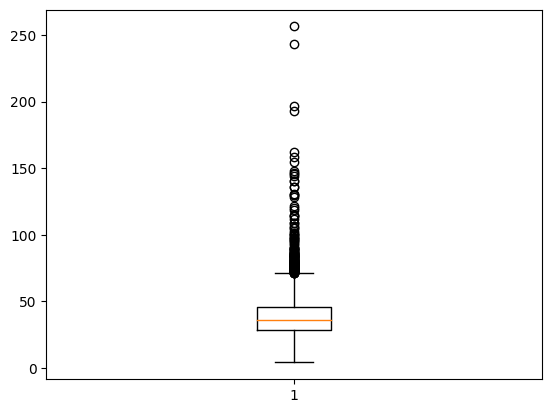

(6425, 28)


In [15]:
plt.boxplot(data["SOM"])
plt.show()

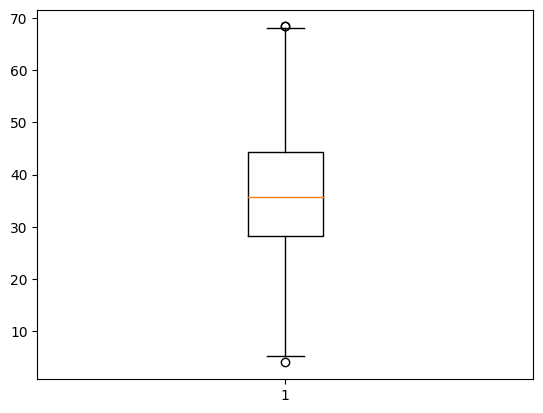

(6213, 28)


In [41]:
# 剔除离群值（Z-score）
z_scores = (data["SOM"]-data["SOM"].mean())/data["SOM"].std()
z_scores.describe()
# 设置阈值
z_score_filter= 1.95
z_filter_data = data[z_scores<z_score_filter]
z_filter_data
plt.boxplot(z_filter_data["SOM"])
plt.show()
print(z_filter_data.shape)

In [42]:
X = z_filter_data.drop(columns='SOM')
y = z_filter_data['SOM']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
# 定义随机森林超参数的取值范围
param_dist = {
    'n_estimators': np.arange(10, 1000, 10),
    'max_features': [1.0],
    'max_depth': [None] + list(np.arange(1, 28)),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'bootstrap': [True, False]
}

# 创建随机森林回归器
clf = RandomForestRegressor()

# 使用RandomizedSearchCV来寻找最佳参数
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=150, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# 打印最佳参数
print('Best Parameters: \n', random_search.best_params_)

# 使用最佳参数对测试集进行评估
best_clf = random_search.best_estimator_
score = best_clf.score(X_test, y_test)
print('Test accuracy:', score)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: 
 {'n_estimators': 890, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 1.0, 'max_depth': 26, 'bootstrap': True}
Test accuracy: 0.17467530242603313


In [44]:
# 使用最优参数训练RandomForestRegressor模型
rf = RandomForestRegressor(n_estimators=890,criterion='squared_error', min_samples_split=7, min_samples_leaf= 4, max_features=1.0, max_depth=26, bootstrap= True)
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
r2_score(y_test,y_test_pred),r2_score(y_train,y_train_pred)

(0.2191749259261897, 0.758662375641898)

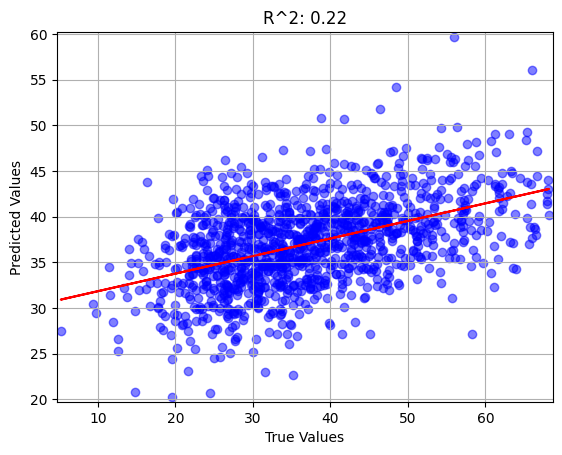

In [45]:
r2 = r2_score(y_test,y_test_pred)
# 画图
plt.scatter(y_test, y_test_pred, c='b', alpha=0.5)

fit = np.polyfit(y_test, y_test_pred,deg=1)
fit_fn = np.poly1d(fit) 
plt.plot(y_test, fit_fn(y_test), c='r')

plt.xlim([min(y_test)-0.5, max(y_test)+0.5])
plt.ylim([min(y_test_pred)-0.5, max(y_test_pred)+0.5])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('R^2: %.2f' % r2)
plt.grid()

plt.show()

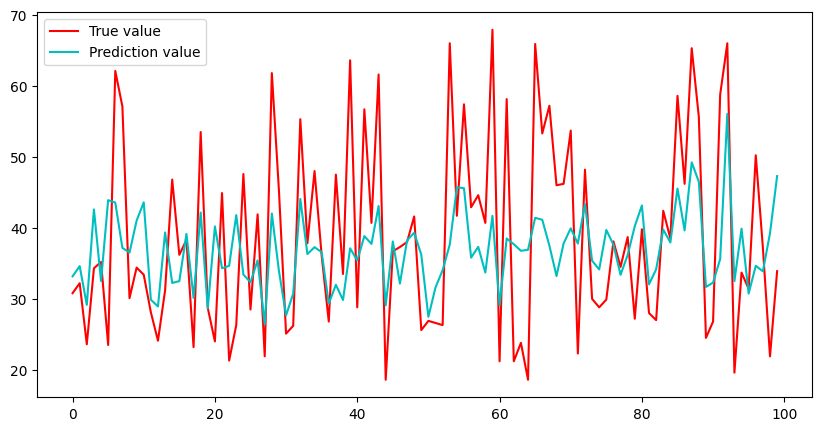

In [46]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test[:100])),y_test[:100],c='r',label='True value')
plt.plot(range(len(y_test_pred[:100])),y_test_pred[:100],c='c',label = 'Prediction value')
plt.legend()
plt.show()

In [47]:
mse_score = mean_squared_error(y_test, y_test_pred)
mae_score = mean_absolute_error(y_test, y_test_pred)
mape_score = mean_absolute_percentage_error(y_test, y_test_pred)
print('Mse:', mse_score,'Mae',mae_score,'Mape',mape_score)


Mse: 108.93009954630983 Mae 8.368195446933875 Mape 0.2612121334817315


In [48]:
rf.feature_importances_

array([0.03268426, 0.02941242, 0.04927009, 0.02621224, 0.02335153,
       0.02010247, 0.04266719, 0.00381343, 0.03739397, 0.03385754,
       0.03824423, 0.02129258, 0.07721983, 0.00888686, 0.03487565,
       0.03747597, 0.03284906, 0.04221234, 0.02826368, 0.0498609 ,
       0.03212553, 0.03347673, 0.04025645, 0.02366218, 0.07078334,
       0.05003626, 0.07971329])

In [49]:
sum(rf.feature_importances_)

1.0

In [50]:
a = rf.feature_importances_

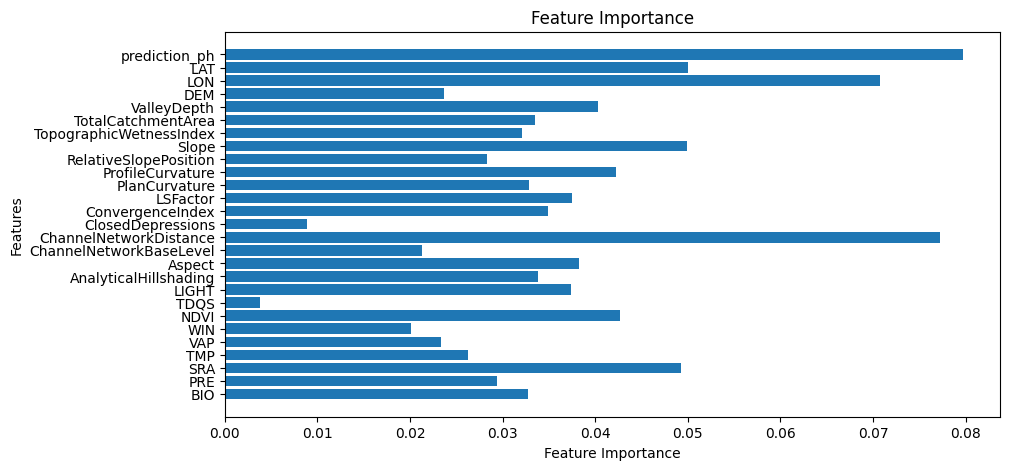

In [51]:
# 绘制特征重要性柱状图
plt.figure(figsize=(10, 5))
plt.barh(data.columns.drop('SOM'), a)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [52]:
# 递归特征消除 (选择最佳组合特征)
from sklearn.feature_selection import RFE,RFECV

# RFE
selector = RFECV(rf,step=1,cv=5,n_jobs=4)
selector = selector.fit(X_train, y_train)

# 查看选中的特征
selected_features = selector.support_
# 计算测试集的 R2 分数
y_pred = selector.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Selected Features: ", selected_features)
print("Number of Selected Features: ", selector.n_features_)
print("R2 Score: ", r2)

Selected Features:  [ True False  True  True False False  True False False False  True False
  True False False False False False False  True False  True  True False
  True  True  True]
Number of Selected Features:  12
R2 Score:  0.21892328026453167


In [53]:
# 迭代优化 (选择最佳组合特征)

best_score = 0
best_features = None

# 尝试不同数量的特征
for i in range(1, X_train.shape[1] + 1):
    # RFE 选择特征
    selector = RFE(rf, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)

    # 预测并计算 R2 分数
    y_pred = selector.predict(X_test)
    score = r2_score(y_test, y_pred)

    # 更新最佳分数和特征
    if score > best_score:
        best_score = score
        best_features = selector.support_

print("Best R2 Score: ", best_score)
print("Best Features: ", best_features)

Best R2 Score:  0.23051012590558473
Best Features:  [False False False  True False False False False False False False False
  True False False False False False False  True False False False False
  True  True  True]
